### 1. Getting started with Jobs Analysis

- Total Job Roles
- Job role with maximum salary | salary pattern
- most demandable job role
- best company hiring for a specific job role
- total no of companie hitring for the role
- top responsibilities based on a job role

#### 1.1) Loading the Dataset

In [36]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# !git clone https://github.com/AshishJangra27/datasets

df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')

#### 1.2) Handling Null Data

In [37]:
print('Earleir : ', len(df))

df.dropna(subset = 'job_id',inplace = True)
df['experience'].fillna('5-10 Yrs', inplace = True)
df['location'].fillna('Bangalore/Bengaluru', inplace = True)
df.dropna(subset = ['resposibilities','company'],inplace = True)

print('After : ', len(df))

Earleir :  79147
After :  78646


#### 1.3) Handling Duplicate Values

In [38]:
print(len(df) - df['job_id'].nunique())

df.drop_duplicates(subset = 'job_id', inplace = True)

print(len(df) - df['job_id'].nunique())

5658
0


### 2. Data Exploration & Cleaning

#### 2.1) Cleaning job_id

In [39]:
df['job_id'] = df['job_id'].astype('int').astype('object')

#### 2.2) Cleaning experience

In [40]:
df['min_experience'] = df['experience'].str.replace(' Yrs','').str.split('-').str[0].astype('int')
df['max_experience'] = df['experience'].str.replace(' Yrs','').str.split('-').str[-1].astype('int')

#### 2.3) Cleaning reviews

In [ ]:
df['reviews'] = df['reviews'].str.replace(' Reviews','')

### 3. Data Analsis & Visualizaiotns

#### 3.1) Total Job Postings

In [74]:
len(df['job_role'])

72988

#### 3.2) Tableau vs Powerbi Jobs

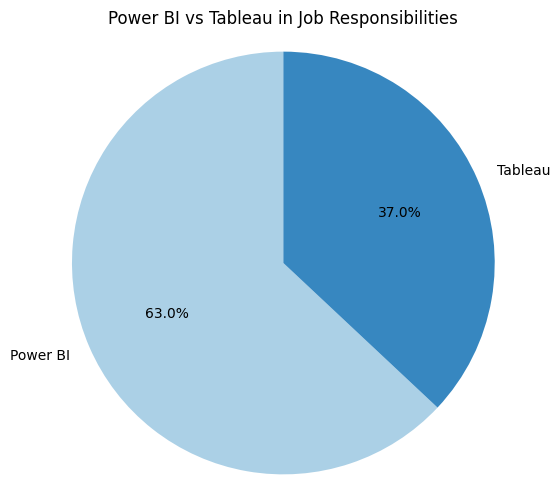

In [105]:
powerbi_count = df['resposibilities'].str.split(',').explode().str.lower().str.contains('power bi').sum() + df['resposibilities'].str.split(',').explode().str.lower().str.contains('powerbi').sum()
tableau_count = df['resposibilities'].str.split(',').explode().str.lower().str.contains('tableau').sum()


labels = ['Power BI', 'Tableau']
sizes = [powerbi_count, tableau_count]

colors = sns.color_palette("Blues", n_colors=2)

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Power BI vs Tableau in Job Responsibilities')
plt.axis('equal')

plt.show()

#### 3.3) Top 25 Most Popular Job roles on Naukri

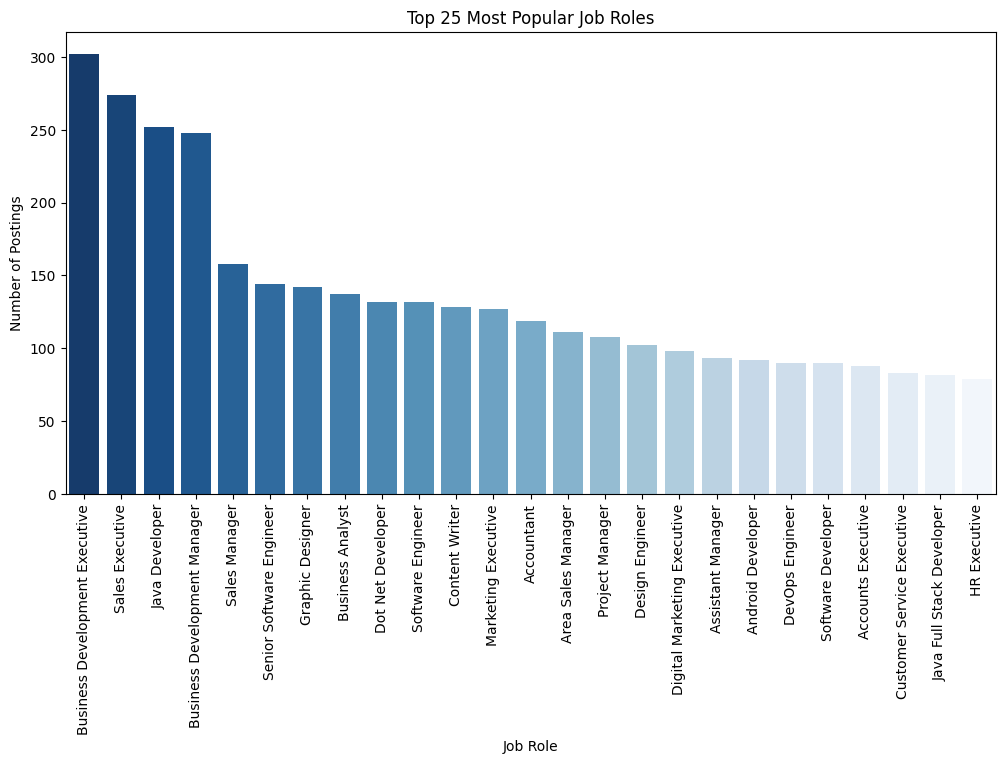

In [108]:
top_25_roles = df['job_role'].value_counts().head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_25_roles.index, y=top_25_roles.values, palette="Blues_r")

plt.title('Top 25 Most Popular Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)

plt.show()

In [88]:
df[df['job_role'] == 'Data Scientist']['resposibilities'].str.split(',').explode().value_counts().head(20)

,count
resposibilities,
Python,18
Machine Learning,9
deep learning,6
TensorFlow,5
R,5
Data Science,5
Analytics,5
SAS,4
python,4


In [45]:
df['location'].value_counts()

,count
location,
Bangalore/Bengaluru,11126
Hyderabad/Secunderabad,3728
Pune,3211
Chennai,2921
Mumbai,2813
...,...
"Noida, Rewa, Gwalior, Jhansi, Ghaziabad, New Delhi, Satna, Jaipur, Jodhpur",1
"Imphal, Ambikapur, Mahrajganj, Bhopal, Korba, Raigarh, Bhadohi, Bilaspur, Raipur",1
"Noida, Haridwar, New Delhi, Lucknow, Ahmedabad, Jaipur, Surat, Delhi / NCR, Vadodara",1


In [15]:

lst = []

min_salary_lst = []
max_salary_lst = []

for salary in df['salary']:

  if salary != 'Not disclosed':

    salary = salary.split('(')[0]


    if 'Cr' in salary:
      max_salary = int(float(salary.split(' Cr')[0].split('-')[-1])*10000000)
      if len(salary.split(' Cr')[0].split('-')) == 2:
        min_salary = salary.split(' Cr')[0].split('-')[0]
      else:
        min_salary = max_salary

    else:
      min_salary = salary.split('-')[0].split(' ')[0]
      max_salary = salary.split('-')[-1]


    min_salary_lst.append(min_salary)
    max_salary_lst.append(max_salary)

  else:
    lst.append(salary)

print(set(lst))

{'Not disclosed'}


In [132]:
df

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,clean_country
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,Turkey
1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,Turkey
2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,Georgia
3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,Turkey
4,51245886,Bungalov Ev 2,0.00,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,Turkey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠁,C...",...,South Korea,8,0,4,0,0,0,3 00 pm - 11 00 pm,11 00 am,South Korea
12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Indonesia,0,1,2,1,1,0,3 00 pm - 10 00 pm,12 00 pm,Indonesia
12802,32977697,Paradise Eco Hub,4.67,3,Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,Uganda,1,2,2,0,1,0,After 3 00 pm,NaN,Uganda
12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,Indonesia,2,4,8,0,2,0,Flexible,12 00 pm,Indonesia


In [145]:
country = 'Japan'

print(int(df[df['clean_country'] == country]['price'].min()))
print(int(df[df['clean_country'] == country]['price'].mean()))
print(int(df[df['clean_country'] == country]['price'].max()))

1330
10416
64317


In [150]:
df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')

df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
79142,6.012301e+10,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,...",2 Days Ago,https://www.naukri.com/job-listings-net-fullst...,https://www.naukri.com/citiustech-jobs-careers...
79143,1.122201e+10,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil...",1 Day Ago,https://www.naukri.com/job-listings-senior-bi-...,https://www.naukri.com/hexaware-technologies-j...
79144,1.512220e+11,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax",2 Days Ago,https://www.naukri.com/job-listings-powerbi-de...,https://www.naukri.com/ey-jobs-careers-9156
79145,2.712220e+11,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service...",10 Days Ago,https://www.naukri.com/job-listings-customer-s...,https://www.naukri.com/tech-mahindra-jobs-care...


In [153]:
df['company'].nunique()

15313

In [ ]:
df['location'].str.replace('/',',').str.split(',').explode().str.strip().value_counts().head(20)

In [ ]:
experience_counts = []

for exp in range(df['min_experience'].min(), df['max_experience'].max() + 1):
  experience_counts.append([exp,len(df[(df['max_experience'] >= exp) & (df['min_experience'] <= exp)])])

experience_counts

experience_df = pd.DataFrame(experience_counts, columns=['Experience', 'Job Count'])

plt.figure(figsize=(12, 6))  # Adjust width and height as desired
sns.barplot(x='Experience', y='Job Count', data=experience_df, palette='gray')

plt.title('Number of Jobs by Experience Level')
plt.xlabel('Experience (Years)')
plt.ylabel('Job Count')
plt.show()